##MNIST FASHION DATASET AUTOENCODER


![image.png](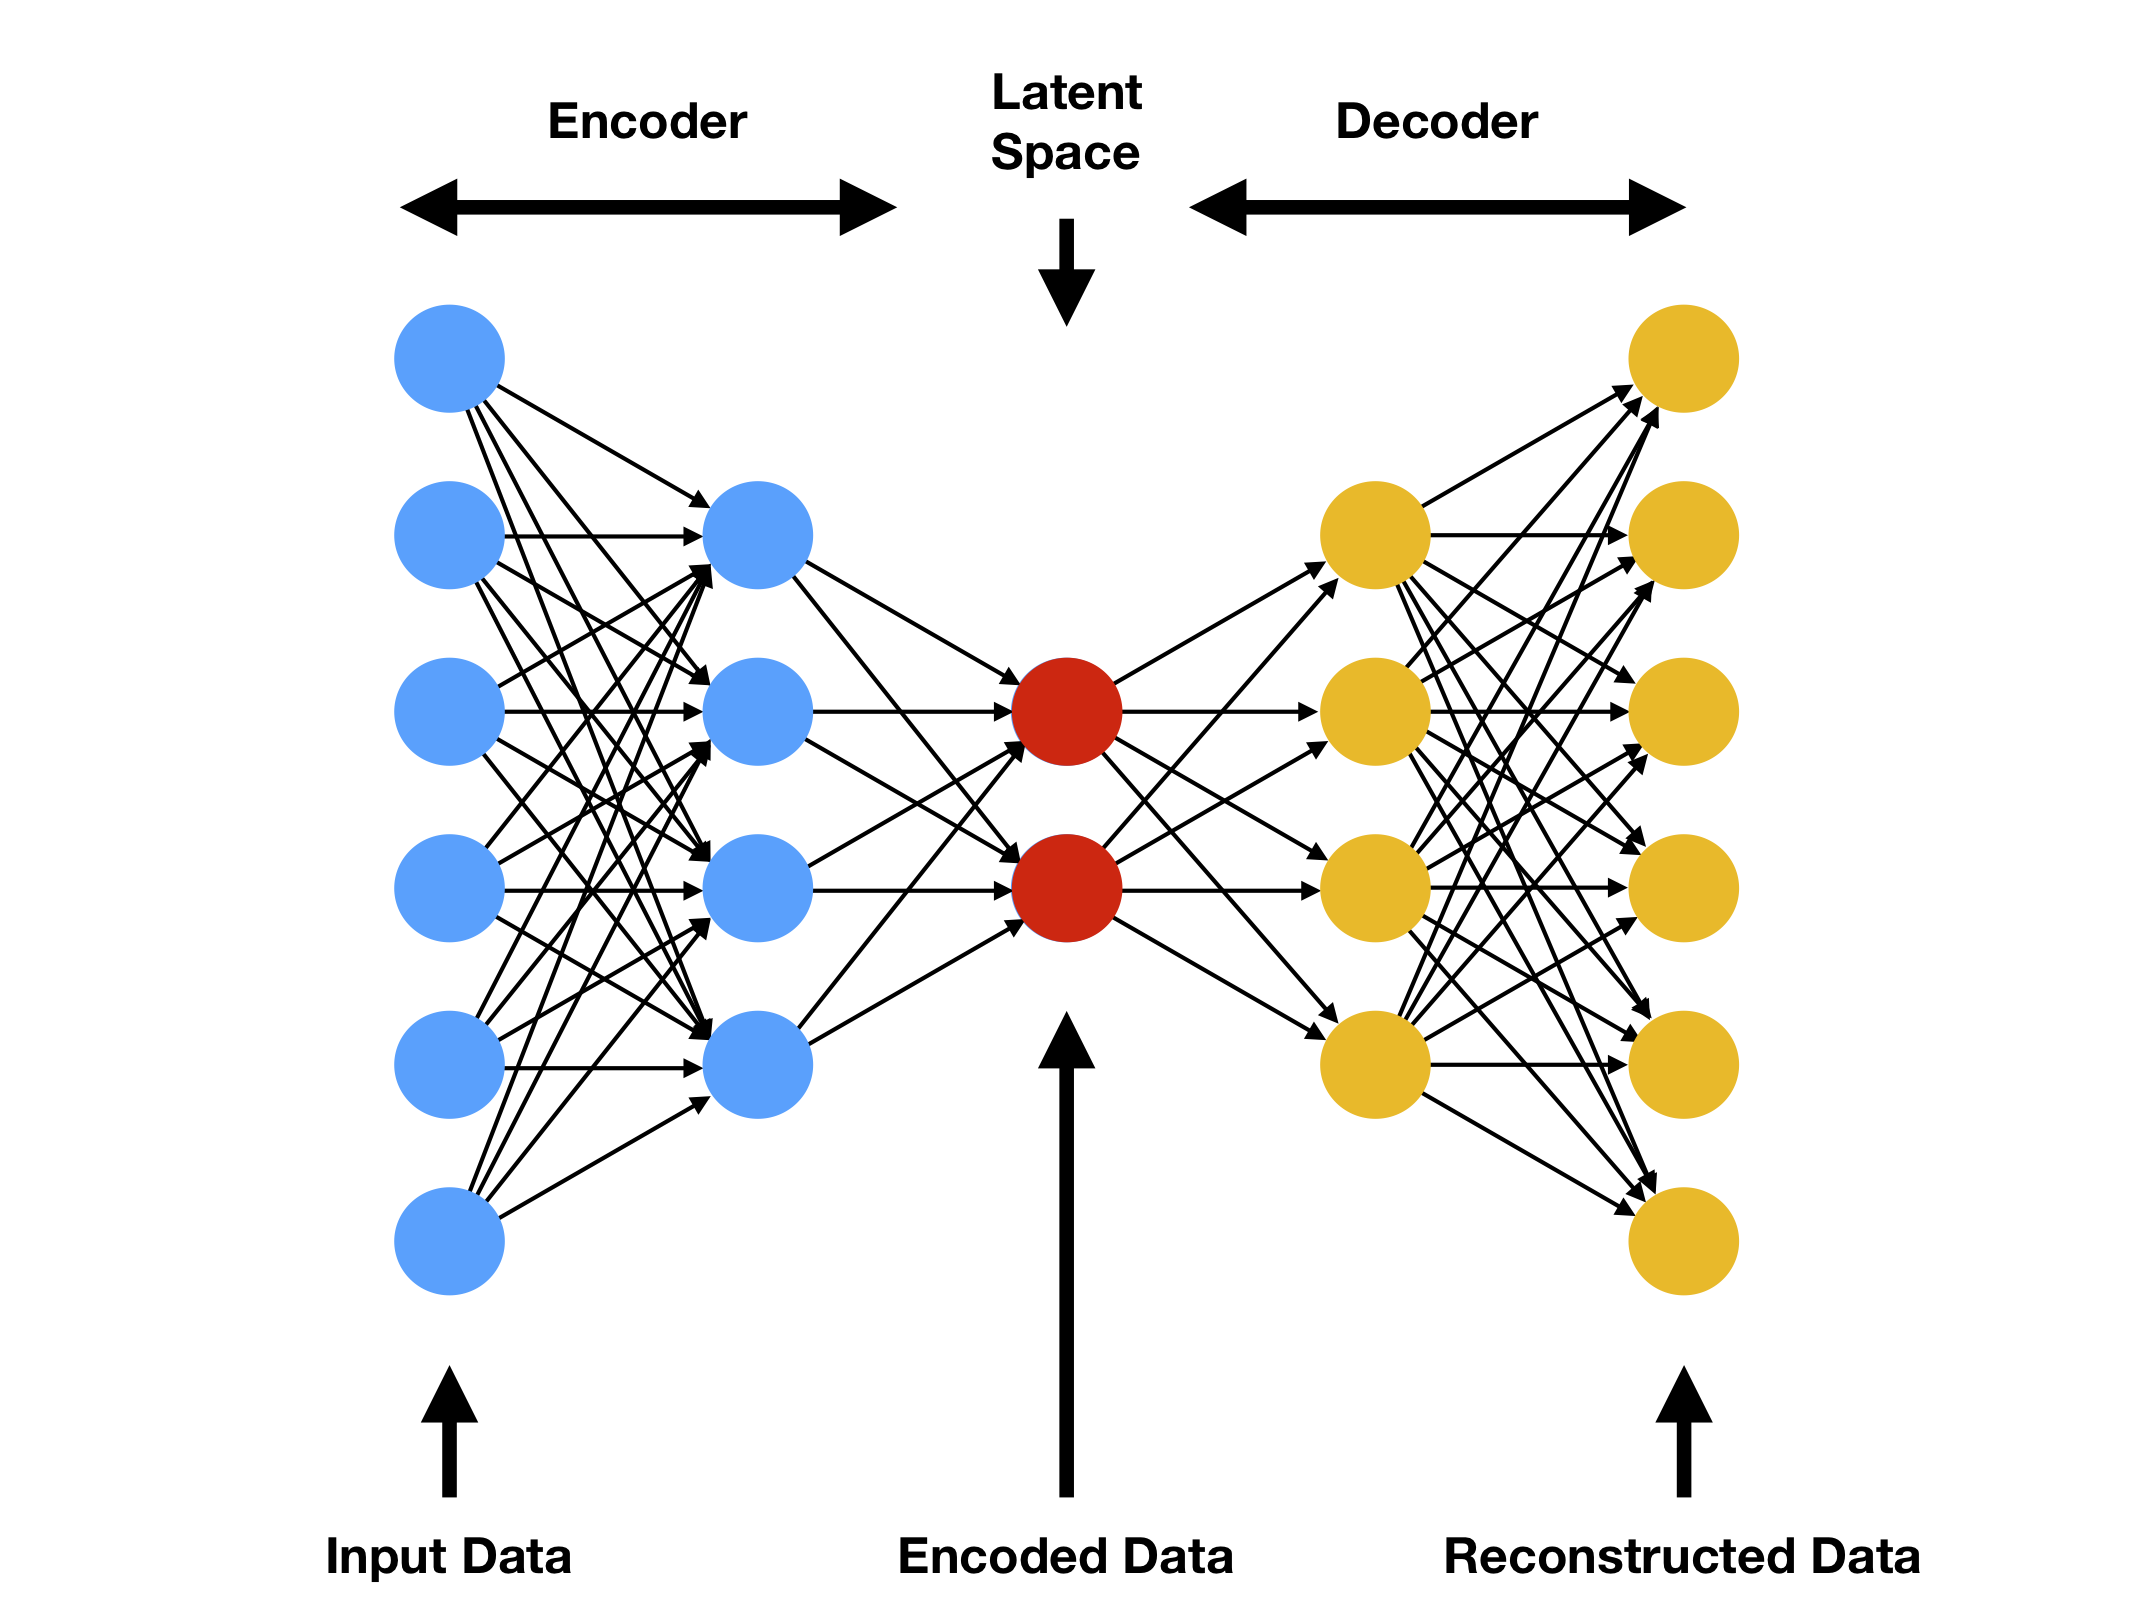![image.png]( ))

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



In [ ]:
# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)


In [ ]:
autoencoder = Model(input_img,decoded)

train the autoencoder


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7374 - val_loss: 0.4777
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4970 - val_loss: 0.4510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4457 - val_loss: 0.4090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4153 - val_loss: 0.4052
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4072 - val_loss: 0.3826
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3856 - val_loss: 0.4115
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3994 - val_loss: 0.3885
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3834 - val_loss: 0.3808
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3795 - val_loss: 0.3805
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3848 - val_loss: 0.4014


In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,850 (2.31 MB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,234 (1.54 MB)

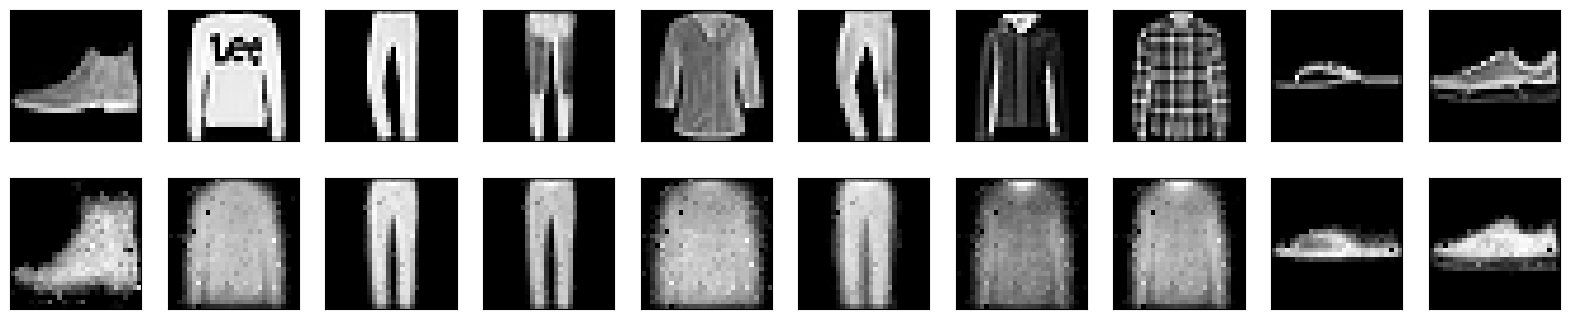

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show all at once
plt.show()

## MNIST DIGIT DATASET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This is the correct magic command for plotting inside Jupyter notebooks
%matplotlib inline

# Correct import for MNIST dataset
from tensorflow.keras.datasets import mnist

# Correct layer and model imports
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
# Load MNIST dataset
(trainx, trainy), (testx, testy) = mnist.load_data()

# Print shapes
print("Train shape:", trainx.shape, trainy.shape)
print("Test shape:", testx.shape, testy.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


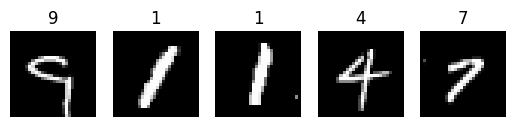

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for j in range(5):
    i = np.random.randint(0, 1000)  # Random index
    plt.subplot(1, 5, j + 1)        # 1 row, 5 columns, position j+1
    plt.imshow(trainx[i], cmap="gray")  # Use grayscale colormap
    plt.title(str(trainy[i]))      # Show label as title
    plt.axis('off')                # Hide axis

plt.show()

In [ ]:
train_data = np.reshape(trainx, (60000, 28 * 28))
test_data = np.reshape(testx, (10000, 28 * 28))

print(train_data.shape, test_data.shape)

NameError: name 'np' is not defined

In [ ]:
input_data = Input(shape=(784,))
encoder = Dense(100, activation='relu')(input_data)
encoder = Dense(50, activation='relu')(encoder)
encoder = Dense(25, activation='relu')(encoder)


In [ ]:

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(50, activation='relu')(decoder)
decoder = Dense(100, activation='relu')(decoder)
decoder = Dense(784)(decoder)


In [ ]:
autoencoder = Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

train the model


In [ ]:
# 1. Reshape
train_data = np.reshape(trainx, (60000, 28 * 28))
test_data = np.reshape(testx, (10000, 28 * 28))

# 2. Normalize and convert to float32
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# 3. Now training will work
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=256,
    validation_data=(test_data, test_data)
)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for

In [ ]:
n= 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display orginal images
    ax= plt.subplot(2, n, i+1)
    plt.imshow(testx[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()